# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

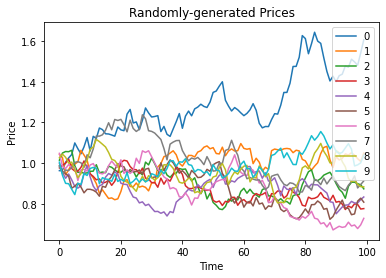

In [ ]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

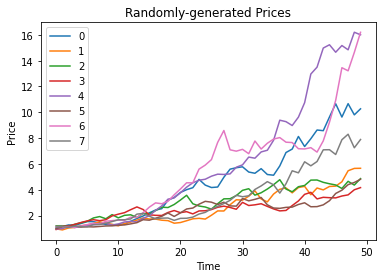

In [ ]:
# Mi ejemplo 
r = pd.DataFrame(np.random.normal(1.05, 0.09, (50, 8)))
p = r.cumprod()
p.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [ ]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [ ]:
# Mi ejemplo
s1 = pd.Series([9, 8, np.nan, 6, 5, np.nan, 3, 2, np.nan, 0])
print (s1)

0    9.0
1    8.0
2    NaN
3    6.0
4    5.0
5    NaN
6    3.0
7    2.0
8    NaN
9    0.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [ ]:
print (s.name)

None


In [ ]:
# Mi ejemplo 
print (s1.name)

None


This name can be directly modified with no repercussions.

In [ ]:
s.name = "Toy Series"
print (s.name)

Toy Series


In [ ]:
# Mi ejemplo
s1.name = "Digitos"
print (s1.name)

Digitos


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [ ]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


In [ ]:
# Mi ejemplo
print (s1.index)

RangeIndex(start=0, stop=10, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [ ]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# Mi ejemplo
# Frecuencia en meses 'M'
u = pd.date_range("2020-01-01", periods=len(s1), freq="M")
print (u)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='M')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# Mi ejemplo
s1.index = u
print (s1.index)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='M')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [ ]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


In [ ]:
# Mi ejemplo
print ("Third element of the series: ", s1.iloc[3])
print ("Last element of the series: ", s1.iloc[len(s1)-1])

Third element of the series:  6.0
Last element of the series:  0.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [ ]:
# Mi ejemplo
# Muestre los 4 primeros
s1.iloc[:4]

2020-01-31    9.0
2020-02-29    8.0
2020-03-31    NaN
2020-04-30    6.0
Freq: M, Name: Digitos, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [ ]:
# Mi ejemplo
# iloc con variables
start = 0
end = len(s1) - 1 # No muestra el último
step = 1

s1.iloc[start:end:step]

2020-01-31    9.0
2020-02-29    8.0
2020-03-31    NaN
2020-04-30    6.0
2020-05-31    5.0
2020-06-30    NaN
2020-07-31    3.0
2020-08-31    2.0
2020-09-30    NaN
Freq: M, Name: Digitos, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [ ]:
# Mi ejemplo
# Muestra los datos en reversa
s1.iloc[::-1]

2020-10-31    0.0
2020-09-30    NaN
2020-08-31    2.0
2020-07-31    3.0
2020-06-30    NaN
2020-05-31    5.0
2020-04-30    6.0
2020-03-31    NaN
2020-02-29    8.0
2020-01-31    9.0
Freq: -1M, Name: Digitos, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [ ]:
# Mi ejemplo 
# Inicia en posicion -4, cuanta hasta la posicion -7 y va de un en uno
s1.iloc[-4:-7:-1]

2020-07-31    3.0
2020-06-30    NaN
2020-05-31    5.0
Freq: -1M, Name: Digitos, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [ ]:
s.loc['2016-01-01']

1.0

In [ ]:
# Mi ejemplo
s1.loc['2020-02-29']

8.0

Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [ ]:
# Mi ejemplo
s1.loc['2020-02-29':'2020-07-31']

2020-02-29    8.0
2020-03-31    NaN
2020-04-30    6.0
2020-05-31    5.0
2020-06-30    NaN
2020-07-31    3.0
Freq: M, Name: Digitos, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [ ]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [ ]:
# Mi ejemplo
# Hay menores de 3? Falso o verdadero
print (s1 < 3)

2020-01-31    False
2020-02-29    False
2020-03-31    False
2020-04-30    False
2020-05-31    False
2020-06-30    False
2020-07-31    False
2020-08-31     True
2020-09-30    False
2020-10-31     True
Freq: M, Name: Digitos, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [ ]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [ ]:
# Mi ejemplo
# Muestra los mayores que 4
print (s1.loc[s1 > 4])

2020-01-31    9.0
2020-02-29    8.0
2020-04-30    6.0
2020-05-31    5.0
Name: Digitos, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [ ]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [ ]:
# Mi ejemplo
# Mayores o iguales que 5 pero menores que 8
print (s1.loc[(s1 >= 5) & (s1 < 8)])

2020-04-30    6.0
2020-05-31    5.0
Freq: M, Name: Digitos, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

NameError: ignored

> *Ya que **"get_pricing"** no funciona, debido a que Quantopian cerró, entonces utilicé **"data_reader"**. Primero se instaló pandas-reader con el siguiente comando:*

In [ ]:
!pip install pandas-datareader

> *Se llaman  algunas funciones que pueden ser requeridas y se procede a ejecutar la función "data_reader":

In [ ]:
# Mi ejemplo
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime 

In [ ]:
# Arreglando el ejercicio 
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
pric = pdr.get_data_yahoo(symbol, start, end)
prices = pric['Adj Close']

In [ ]:
# Mi ejemplo
# Chipotle Mexican Grill, Inc. (CMG)
# s = "CMG"
# Netflix, Inc. (NFLX)
s = 'NFLX'
inicio = datetime.datetime(2020,12,11)
fin = datetime.datetime(2021,3,11)
pr = pdr.get_data_yahoo(s, inicio, fin)

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [ ]:
print ("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.series.Series'>


Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
# .head retorna las primera n casillas
y = pr['Adj Close']
print("\n", type(y))
y.head(8)


 <class 'pandas.core.series.Series'>


Date
2020-12-11    503.220001
2020-12-14    522.419983
2020-12-15    519.780029
2020-12-16    524.830017
2020-12-17    532.900024
2020-12-18    534.450012
2020-12-21    528.909973
2020-12-22    527.330017
Name: NFLX, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [ ]:
print ('Old name: ', prices.name)
prices.name = symbol
print ('New name: ', prices.name)

Old name:  CMG
New name:  CMG


In [ ]:
# Mi ejemplo
print ('Old name: ', y.name)
y.name = s
print ('New name: ', y.name)

Old name:  NFLX
New name:  NFLX


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [ ]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


In [ ]:
# Mi ejemplo
print (y.index)

DatetimeIndex(['2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-22',
               '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
      

Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [ ]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

AttributeError: ignored

In [ ]:
# el Código anterior no funciona así, por tanto,
# Es necesario añadirle un .mean() para que sea una serie
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

Date
2012-01-31    354.829002
2012-02-29    379.535503
2012-03-31    407.002272
2012-04-30    422.798997
2012-05-31    405.805456
2012-06-30    403.033335
2012-07-31    353.880474
2012-08-31    294.535219
2012-09-30    326.513160
2012-10-31    276.573333
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
pr_m = y.resample('M').mean()
print(pr_m)

Date
2020-12-31    524.114286
2021-01-31    526.816845
2021-02-28    548.959999
2021-03-31    519.356672
Freq: M, Name: NFLX, dtype: float64


The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [ ]:
monthly_prices_med = prices.resample('M', how='median').mean()
monthly_prices_med.head(10)

TypeError: ignored

In [ ]:
# El método anterior no funciona, por lo tanto,
# se usa la dunción median() al final para lograrlo
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
pr_m_med = y.resample('M').median()
print(pr_m_med)

Date
2020-12-31    524.710022
2021-01-31    520.799988
2021-02-28    548.219971
2021-03-31    516.390015
Freq: M, Name: NFLX, dtype: float64


We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [ ]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

TypeError: ignored

In [ ]:
# El anterior código no funciona, por lo tanto,
# se usa la función resample().first() para
# devolver el primer vaor del período

first_of_month_prices = prices.resample('M').first()
first_of_month_prices.head(10)

Date
2012-01-31    341.269989
2012-02-29    370.410004
2012-03-31    394.100006
2012-04-30    418.399994
2012-05-31    419.890015
2012-06-30    397.140015
2012-07-31    383.459991
2012-08-31    280.670013
2012-09-30    285.989990
2012-10-31    316.130005
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
pr_first = y.resample('M').first()
print(pr_first)

Date
2020-12-31    503.220001
2021-01-31    522.859985
2021-02-28    539.039978
2021-03-31    550.640015
Freq: M, Name: NFLX, dtype: float64


We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [ ]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

TypeError: ignored

In [ ]:
# El anterior código no funciona, por lo tano,
# Debe usarse la función .tz_localize()
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    341.269989
2012-01-04 00:00:00-05:00    348.750000
2012-01-05 00:00:00-05:00    350.480011
2012-01-06 00:00:00-05:00    348.950012
2012-01-09 00:00:00-05:00    339.739990
2012-01-10 00:00:00-05:00    341.119995
2012-01-11 00:00:00-05:00    347.600006
2012-01-12 00:00:00-05:00    347.619995
2012-01-13 00:00:00-05:00    354.619995
2012-01-17 00:00:00-05:00    353.380005
Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
pr_eastern = y.tz_localize('US/Eastern')
print(pr_eastern)

Date
2020-12-11 00:00:00-05:00    503.220001
2020-12-14 00:00:00-05:00    522.419983
2020-12-15 00:00:00-05:00    519.780029
2020-12-16 00:00:00-05:00    524.830017
2020-12-17 00:00:00-05:00    532.900024
                                ...    
2021-03-05 00:00:00-05:00    516.390015
2021-03-08 00:00:00-05:00    493.329987
2021-03-09 00:00:00-05:00    506.440002
2021-03-10 00:00:00-05:00    504.540009
2021-03-11 00:00:00-05:00    523.059998
Name: NFLX, Length: 61, dtype: float64


In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [ ]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print (calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [ ]:
# Mi ejemplo
fechas = pd.date_range(start= inicio, end= fin, freq='D', tz='UTC')
print (fechas)

DatetimeIndex(['2020-12-11 00:00:00+00:00', '2020-12-12 00:00:00+00:00',
               '2020-12-13 00:00:00+00:00', '2020-12-14 00:00:00+00:00',
               '2020-12-15 00:00:00+00:00', '2020-12-16 00:00:00+00:00',
               '2020-12-17 00:00:00+00:00', '2020-12-18 00:00:00+00:00',
               '2020-12-19 00:00:00+00:00', '2020-12-20 00:00:00+00:00',
               '2020-12-21 00:00:00+00:00', '2020-12-22 00:00:00+00:00',
               '2020-12-23 00:00:00+00:00', '2020-12-24 00:00:00+00:00',
               '2020-12-25 00:00:00+00:00', '2020-12-26 00:00:00+00:00',
               '2020-12-27 00:00:00+00:00', '2020-12-28 00:00:00+00:00',
               '2020-12-29 00:00:00+00:00', '2020-12-30 00:00:00+00:00',
               '2020-12-31 00:00:00+00:00', '2021-01-01 00:00:00+00:00',
               '2021-01-02 00:00:00+00:00', '2021-01-03 00:00:00+00:00',
               '2021-01-04 00:00:00+00:00', '2021-01-05 00:00:00+00:00',
               '2021-01-06 00:00:00+00:00', '2021-0

Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [ ]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

TypeError: ignored

In [ ]:
# El anterior ejemplo no funciona pues,
# no puede comparar las marcas de tiempo
# entonces se usa .tz_locatize sobre la serie 'prices'
calendar_prices = prices.tz_localize('US/Eastern').reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00           NaN
2012-01-02 00:00:00+00:00           NaN
2012-01-03 00:00:00+00:00           NaN
2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
2012-01-11 00:00:00+00:00    341.119995
2012-01-12 00:00:00+00:00    347.600006
2012-01-13 00:00:00+00:00    347.619995
2012-01-14 00:00:00+00:00    354.619995
2012-01-15 00:00:00+00:00    354.619995
Freq: D, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
calend = y.tz_localize('US/Eastern').reindex(fechas, method='ffill')
print (calend)

2020-12-11 00:00:00+00:00           NaN
2020-12-12 00:00:00+00:00    503.220001
2020-12-13 00:00:00+00:00    503.220001
2020-12-14 00:00:00+00:00    503.220001
2020-12-15 00:00:00+00:00    522.419983
                                ...    
2021-03-07 00:00:00+00:00    516.390015
2021-03-08 00:00:00+00:00    516.390015
2021-03-09 00:00:00+00:00    493.329987
2021-03-10 00:00:00+00:00    506.440002
2021-03-11 00:00:00+00:00    504.540009
Freq: D, Name: NFLX, Length: 91, dtype: float64


You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [ ]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+00:00    501.082728
2012-01-02 00:00:00+00:00    501.082728
2012-01-03 00:00:00+00:00    501.082728
2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
Freq: D, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
ss = calend.fillna(calend.mean())
ss.head(10)

2020-12-11 00:00:00+00:00    531.554110
2020-12-12 00:00:00+00:00    503.220001
2020-12-13 00:00:00+00:00    503.220001
2020-12-14 00:00:00+00:00    503.220001
2020-12-15 00:00:00+00:00    522.419983
2020-12-16 00:00:00+00:00    519.780029
2020-12-17 00:00:00+00:00    524.830017
2020-12-18 00:00:00+00:00    532.900024
2020-12-19 00:00:00+00:00    534.450012
2020-12-20 00:00:00+00:00    534.450012
Freq: D, Name: NFLX, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    341.269989
2012-01-02 00:00:00+00:00    341.269989
2012-01-03 00:00:00+00:00    341.269989
2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
Freq: D, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
func_bfill = calend.fillna(method='bfill')
func_bfill.head(10)

2020-12-11 00:00:00+00:00    503.220001
2020-12-12 00:00:00+00:00    503.220001
2020-12-13 00:00:00+00:00    503.220001
2020-12-14 00:00:00+00:00    503.220001
2020-12-15 00:00:00+00:00    522.419983
2020-12-16 00:00:00+00:00    519.780029
2020-12-17 00:00:00+00:00    524.830017
2020-12-18 00:00:00+00:00    532.900024
2020-12-19 00:00:00+00:00    534.450012
2020-12-20 00:00:00+00:00    534.450012
Freq: D, Name: NFLX, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
2012-01-11 00:00:00+00:00    341.119995
2012-01-12 00:00:00+00:00    347.600006
2012-01-13 00:00:00+00:00    347.619995
Freq: D, Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
dr_p = calend.dropna()
dr_p.head(10)

2020-12-12 00:00:00+00:00    503.220001
2020-12-13 00:00:00+00:00    503.220001
2020-12-14 00:00:00+00:00    503.220001
2020-12-15 00:00:00+00:00    522.419983
2020-12-16 00:00:00+00:00    519.780029
2020-12-17 00:00:00+00:00    524.830017
2020-12-18 00:00:00+00:00    532.900024
2020-12-19 00:00:00+00:00    534.450012
2020-12-20 00:00:00+00:00    534.450012
2020-12-21 00:00:00+00:00    534.450012
Freq: D, Name: NFLX, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

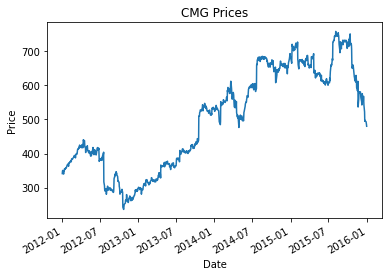

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

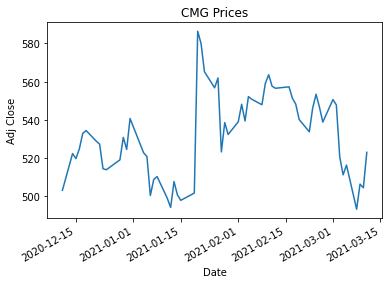

In [ ]:
# Mi ejemplo
y.plot();
plt.title(symbol + " Prices")
plt.ylabel("Adj Close")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print ("Mean: ", prices.mean())
print ("Standard deviation: ", prices.std())

Mean:  501.63665038880487
Standard deviation:  146.68873796090145


In [ ]:
# Mi ejemplo
print ("Mean: ", y.mean())
print ("Standard deviation: ", y.std())

Mean:  531.9929524406058
Standard deviation:  22.14076204350887


> *numpy.mean(arr, axis = None): Calcule la media aritmética (promedio) de los datos dados (elementos de matriz) a lo largo del eje especificado. Empleando la siguiente fórmula:*

$$ Media(x) = \bar{x} = \frac{\sum_{i = 1}^{N}X_{i}}{N},\ siendo\ (X_{1}, X_{2},...,X_{N})\ el\ conjunto\ de\ observaciones. $$

> *numpy.std(arr, axis = None): calcula la desviación estándar de los datos dados (elementos de la matriz) a lo largo del eje especificado (si corresponde).*

> *La desviación estándar (S) se mide como la extensión de la distribución de datos en el conjunto de datos dado. Empleando la siguiente fórmula:*

$$ S_{x} =\sqrt{\frac{\sum_{i = 1}^{N}(x_{i} - \bar{x})^{2}}{N - 1}},\ siendo\ (X_{1}, X_{2},...,X_{N})\ un\ conjunto\ de\ datos. $$

In [ ]:
print ("Summary Statistics")
print (prices.describe())

Summary Statistics
count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555000
50%       521.270020
75%       646.834991
max       757.770020
Name: Adj Close, dtype: float64


In [ ]:
# Mi ejemplo 
print ("Summary Statistics")
print (y.describe())

Summary Statistics
count     61.000000
mean     531.992952
std       22.140762
min      493.329987
25%      514.479980
50%      532.390015
75%      548.219971
max      586.340027
Name: NFLX, dtype: float64


> *La función **describe()**  genera estadísticas descriptivas, estas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los NaNvalores. Analiza series numéricas y de objetos, así como DataFrameconjuntos de columnas de tipos de datos mixtos. La salida variará según lo que se proporcione.*
> *   **DataFrame.count:**
Cuenta el número de observaciones nulas / no NA.
*   **DataFrame.max:**
Máximo de los valores en el objeto.
*   **DataFrame.min:**
Mínimo de los valores en el objeto.
*   **DataFrame.mean:**
Media de los valores.
*   **DataFrame.std:**
Desviación estándar de las observaciones.
*   **DataFrame.select_dtypes:**
Subconjunto de un DataFrame que incluye / excluye columnas según su tipo d.














We can easily modify `Series` with scalars using our basic mathematical operators.

In [ ]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    672.539978
2012-01-04    687.500000
2012-01-05    690.960022
2012-01-06    687.900024
2012-01-09    669.479980
Name: Adj Close, dtype: float64

In [ ]:
# Mi ejemplo
modif_pr = y * 2 - 10
modif_pr.head(5)

Date
2020-12-11     996.440002
2020-12-14    1034.839966
2020-12-15    1029.560059
2020-12-16    1039.660034
2020-12-17    1055.800049
Name: NFLX, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    385.354051
2012-01-04    425.540893
2012-01-05    425.733654
2012-01-06    335.616115
2012-01-09    398.230165
dtype: float64

In [ ]:
# Mi ejemplo
noisy_pr = y + 5 * pd.Series(np.random.normal(0, 5, len(y)), index=y.index) + 15
noisy_pr.head(8)

Date
2020-12-11    532.135538
2020-12-14    567.792970
2020-12-15    561.082037
2020-12-16    531.088134
2020-12-17    571.710535
2020-12-18    549.673505
2020-12-21    528.264425
2020-12-22    544.692599
dtype: float64

> *Una combinación lineal en matemáticas es una expresión construida a partir de un conjunto de términos multiplicando cada término por una constante y sumando los resultados.*

> *Ejemplo de combinación lineal: $a \cdot x + b \cdot y$ es una combinación lineal de $x$ e $y$ con constantes $a$ y $b$.*

> *En general:* $p = \lambda _{1} \cdot x_{1} + \lambda _{2} \cdot x_{2} + \cdots + \lambda _{n} \cdot x_{n}$ *donde $p$ es el producto escalar de los valores* $x_{1}, x_{1}, \cdots x_{n}$ y $\lambda_{1}, \lambda_{1},\cdots \lambda_{n}$ *se llaman escalares.*

> *En la mayoría de las aplicaciones* $x_{1}, x_{1}, \cdots x_{n}$ *son vectores y las lambdas son enteros o números reales.*

If there are no matching indices, however, we may get an empty `Series` in return.

In [ ]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
dtype: float64

In [ ]:
# Mi ejemplo
serieVacia = y + pd.Series(np.random.normal(0, 1, len(y)))
serieVacia.head(5)

2020-12-11 00:00:00   NaN
2020-12-14 00:00:00   NaN
2020-12-15 00:00:00   NaN
2020-12-16 00:00:00   NaN
2020-12-17 00:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [ ]:
# Mi ejemplo
a = y.diff()[1:]
m = y.pct_change()[1:]

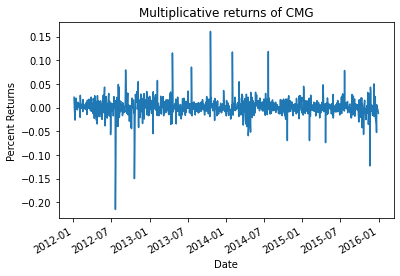

In [ ]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

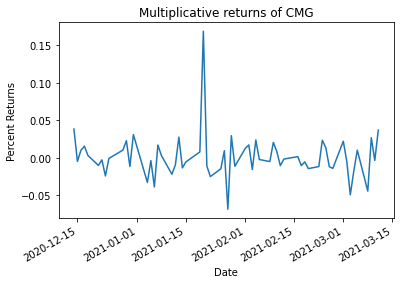

In [ ]:
# Mi ejemplo 
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
m.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [ ]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

AttributeError: ignored

In [ ]:
# La instrucción correcta es:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

In [ ]:
# Mi ejemplo
r = y.rolling(15).mean()
r.name = "15-day rolling mean"

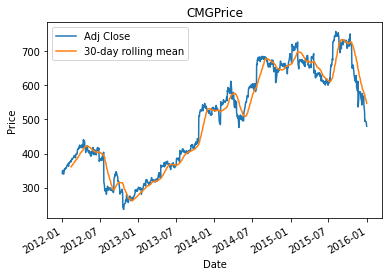

In [ ]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

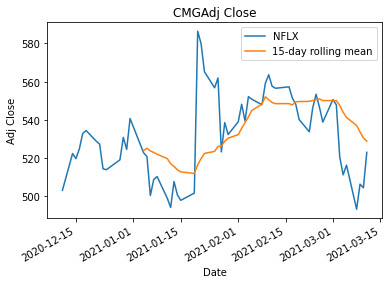

In [ ]:
# Mi ejemplo
y.plot()
r.plot()
plt.title(symbol + "Adj Close")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend();

In [ ]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

AttributeError: ignored

In [ ]:
# La forma correcta es:
rolling_std = prices.rolling(30).mean()
rolling_std.name = "30-day rolling volatility"

In [ ]:
# Mi ejemplo
desvEstd = y.rolling(15).mean()
desvEstd.name = "15-day rolling volatility"

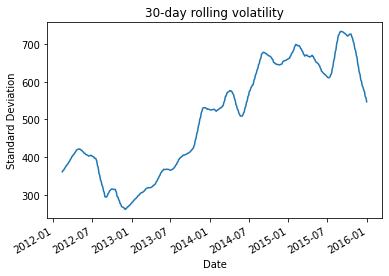

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

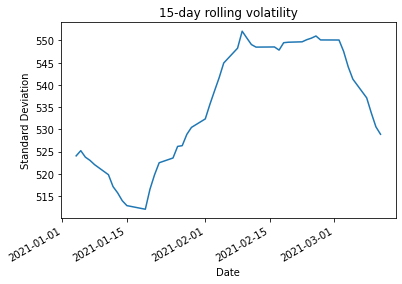

In [ ]:
# Mi ejemplo
desvEstd.plot()
plt.title(desvEstd.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [ ]:
print (np.median(mult_returns))

0.00023590204910717283


In [ ]:
# Mi ejemplo
print (np.median(m))

-0.0033694295478227665


> *La mediana es un estadístico de posición central que parte la distribución en dos, es decir, deja la misma cantidad de valores a un lado que a otro. Para calcular la mediana es importante que los datos estén ordenados de mayor a menor, o al contrario de menor a mayor.*

> *Existen dos métodos para el cálculo de la mediana:*
* Considerando los datos en forma individual, sin agruparlos.

>> *Sea $(X1,X2,…,X_{N})$ un conjunto de datos ordenado. El cálculo de la mediana depende de si el número de elementos N es par o impar.*
>> *   Si N es **impar**, la mediana es el valor que está al medio, es decir:

$$ Mediana(x) = X_{\frac{N + 1}{2}} $$

>> *   Si N es **par**, la mediana es la media de los dos valores del centro, $ \frac{N}{2} $ y $ \frac{N}{2} + 1 $: 

$$ Mediana(x) = Media(X_{\frac{N}{2}},X_{\frac{N}{2}+1}) = \frac{X_{\frac{N}{2}},X_{\frac{N}{2}+1}}{2} $$

> * Utilizando los datos agrupados en intervalos de clase. Para ello hay que seguir dos pasos:

>> *  Encontrar el intervalo en el que se encuentra la mediana usando la fórmula: 

$$ Posicion = \frac{n + 1}{2} $$

>> *  Usar la fórmula de la mediana: 

$$ M_{e} = L_{i} + \frac{\frac{n}{2} - F_{i - 1}}{f_{i}} * A_{i} $$

>> *Donde:*
>>*   $L_{i}$: límite inferior del intervalo en el cual se encuentra la mediana.
>>*   $n$: número de datos del estudio. Es la sumatoria de las frecuencias absolutas.
>>*   $F_{i - 1}$: frecuencia acumulada del intervalo anterior al que se encuentra la mediana.
>>*   $A_{i}$: amplitud del intervalo en el que se encuentra la mediana.
>>*   $f_{i}$: frecuencia absoluta del intervalo en el que se encuentra la mediana.

The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [ ]:
print (mult_returns.median())

0.00023590204910717283


In [ ]:
# Mi ejemplo
print (m.median())

-0.0033694295478227665


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 0.99986631,  1.24616413,  0.46096126,  1.16357145, -0.31645267])}


In [ ]:
# Mi ejemplo
dicc = {"total": [55, 30, 15, 45, 28],
        "Curso": ["Curso de Python", "Curso MatLab", "Curso Adivinación", "NaN", "Sin Cupos"],
        "Asistencia": [True, False, False, True, False],
        10: ["Código", "Nombre", "Apellido", "Universidad", "Sexo"]}
print (dicc)

{'total': [55, 30, 15, 45, 28], 'Curso': ['Curso de Python', 'Curso MatLab', 'Curso Adivinación', 'NaN', 'Sin Cupos'], 'Asistencia': [True, False, False, True, False], 10: ['Código', 'Nombre', 'Apellido', 'Universidad', 'Sexo']}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L  0.999866
2016-01-02  2  K  1.246164
2016-01-03  3  J  0.460961
2016-01-04  4  M  1.163571
2016-01-05  5  Z -0.316453


In [ ]:
# Mi ejemplo
datos = pd.DataFrame(dicc, index=pd.date_range('2021-02-05', periods=5))
print (datos)

            total              Curso  Asistencia           10
2021-02-05     55    Curso de Python        True       Código
2021-02-06     30       Curso MatLab       False       Nombre
2021-02-07     15  Curso Adivinación       False     Apellido
2021-02-08     45                NaN        True  Universidad
2021-02-09     28          Sin Cupos       False         Sexo


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [ ]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [ ]:
# Mi ejemplo
a = pd.Series(['Gato', 'Perro', 'Oveja', 'Vaca'], name='Domésticos')
b = pd.Series(['León', 'Tiburón','Lince', 'Venado'], name="Salvajes")
animals = pd.concat([a, b], axis=1)
print (animals)

  Domésticos Salvajes
0       Gato     León
1      Perro  Tiburón
2      Oveja    Lince
3       Vaca   Venado


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [ ]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


In [ ]:
# Mi ejemplo
print (animals.columns)

Index(['Domésticos', 'Salvajes'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [ ]:
# Mi ejemplo
animals.columns = ['Dom', 'Salv']
print (animals)

     Dom     Salv
0   Gato     León
1  Perro  Tiburón
2  Oveja    Lince
3   Vaca   Venado


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [ ]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [ ]:
# Mi ejemplo
print (animals.index)

RangeIndex(start=0, stop=4, step=1)


In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [ ]:
# Mi ejemplo
animals.index = pd.date_range("2021-01-12", periods=len(animals))
print (animals)

           Domésticos Salvajes
2021-01-12       Gato     León
2021-01-13      Perro  Tiburón
2021-01-14      Oveja    Lince
2021-01-15       Vaca   Venado


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [ ]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

In [ ]:
# Mi ejemplo
animals.values

array([['Gato', 'León'],
       ['Perro', 'Tiburón'],
       ['Oveja', 'Lince'],
       ['Vaca', 'Venado']], dtype=object)

This returns a NumPy array.

In [ ]:
type(numbers.values)

numpy.ndarray

In [ ]:
# Mi ejemplo
type(animals.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

> *Como se ha venido mencionando get_pricing no funciona, entonces:*



In [63]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime 

symbol = ["CMG", "MCD", "SHAK", "LLY"]
start = "2012-01-01"
end = "2016-01-01"
pric = pdr.get_data_yahoo(symbol, start, end)
prices = pric['Adj Close']
if isinstance(symbol, list):
    prices.columns = map(lambda x: x, prices.columns)
else:
    prices.name = symbol

In [64]:
# Mi ejemplo
s = ["AMZN", "NFLX", "AAPL", "GM"]
ini = "2020-06-14"
fn = "2020-12-24"
pre = pdr.get_data_yahoo(s, ini, fn)
precs = pre['Adj Close']
if isinstance(s, list):
    precs.columns = map(lambda x: x, precs.columns)
else:
    precs.name = s

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [65]:
prices.CMG.head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

In [66]:
# Mi ejemeplo
precs.AAPL.head()

Date
2020-06-15    85.318260
2020-06-16    87.579391
2020-06-17    87.457504
2020-06-18    87.492332
2020-06-19    86.992348
Name: AAPL, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [6]:
prices.loc[:, 'CMG'].head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

In [7]:
# Mi ejemplo
precs.loc[:, 'GM'].head()

Date
2020-06-15    27.770000
2020-06-16    27.780001
2020-06-17    27.160000
2020-06-18    27.090000
2020-06-19    26.590000
Name: GM, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [8]:
print (type(prices.CMG))
print (type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
# Mi ejemplo
print (type(precs.AAPL))
print (type(precs.loc[:, 'GM']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [68]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
Date,,
2012-01-03,341.269989,75.681129
2012-01-04,348.750000,76.102287
2012-01-05,350.480011,76.439156
2012-01-06,348.950012,77.028755
2012-01-09,339.739990,76.293686


In [69]:
# Mi ejemplo
precs.loc[:, ['NFLX', 'AAPL', 'GM']].head()

,NFLX,AAPL,GM
Date,,,
2020-06-15,425.500000,85.318260,27.770000
2020-06-16,436.130005,87.579391,27.780001
2020-06-17,447.769989,87.457504,27.160000
2020-06-18,449.869995,87.492332,27.090000
2020-06-19,453.720001,86.992348,26.590000


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [67]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,LLY
Date,,,,
2015-12-15,554.859985,102.119232,41.580002,75.589134
2015-12-16,567.830017,102.913971,40.169998,76.269730
2015-12-17,554.890015,102.617004,38.540001,76.207855
2015-12-18,541.080017,101.883415,39.750000,74.926231
2015-12-21,522.010010,102.782944,38.189999,76.048737
2015-12-22,494.609985,102.809143,39.750000,75.933846


In [13]:
# Mi ejemplo
precs.loc["2020-06-14" : "2020-12-24"]

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000
...,...,...,...,...
2020-12-18,3201.649902,534.450012,126.471016,41.009998
2020-12-21,3206.179932,528.909973,128.038666,41.209999
2020-12-22,3206.520020,527.330017,131.683228,40.900002


This plays nicely with lists of columns, too.

In [70]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
Date,,
2015-12-15,554.859985,102.119232
2015-12-16,567.830017,102.913971
2015-12-17,554.890015,102.617004
2015-12-18,541.080017,101.883415
2015-12-21,522.010010,102.782944
2015-12-22,494.609985,102.809143


In [71]:
# Mi ejemplo
precs.loc["2020-06-14" : "2020-12-24", ['NFLX', 'GM']]

,NFLX,GM
Date,,
2020-06-15,425.500000,27.770000
2020-06-16,436.130005,27.780001
2020-06-17,447.769989,27.160000
2020-06-18,449.869995,27.090000
2020-06-19,453.720001,26.590000
...,...,...
2020-12-18,534.450012,41.009998
2020-12-21,528.909973,41.209999
2020-12-22,527.330017,40.900002


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [72]:
prices.iloc[0:2, 1]

Date
2012-01-03    75.681129
2012-01-04    76.102287
Name: MCD, dtype: float64

In [73]:
# Mi ejemplo
precs.iloc[0:8, 2]

Date
2020-06-15    85.318260
2020-06-16    87.579391
2020-06-17    87.457504
2020-06-18    87.492332
2020-06-19    86.992348
2020-06-22    89.268394
2020-06-23    91.173805
2020-06-24    89.564407
Name: AAPL, dtype: float64

In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

TypeError: ignored

> *No se pueden concatenar tipos range(), ya que el resultado de la concatenación puede no ser un tipo range()).*
> *Pero sí se pueden concatenar tipos range() previamente convertidos en listas. El resultado es lógicamente una lista, que no se puede convertir a tipo range().*

In [74]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,CMG,LLY
Date,,
2012-01-04,348.750000,31.231974
2012-01-06,348.950012,30.595222
2012-01-10,341.119995,30.940464
2012-01-12,347.619995,30.825382
2012-01-17,353.380005,30.710295
2012-01-19,358.089996,30.817711
2012-01-23,360.459991,30.226988
2012-01-25,363.140015,30.602886
2012-01-27,366.760010,30.073544


In [75]:
# Mi ejemplo
precs.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,AMZN,GM
Date,,
2020-06-16,2615.270020,27.780001
2020-06-18,2653.979980,27.090000
2020-06-22,2713.820068,26.370001
2020-06-24,2734.399902,25.280001
2020-06-26,2692.870117,24.459999
2020-06-30,2758.820068,25.299999
2020-07-02,2890.300049,25.240000
2020-07-07,3000.120117,25.129999
2020-07-09,3182.629883,23.420000


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [76]:
prices.loc[prices.CMG > prices.MCD].head()

,CMG,MCD,SHAK,LLY
Date,,,,
2012-01-03,341.269989,75.681129,NaN,32.068211
2012-01-04,348.750000,76.102287,NaN,31.231974
2012-01-05,350.480011,76.439156,NaN,30.917435
2012-01-06,348.950012,77.028755,NaN,30.595222
2012-01-09,339.739990,76.293686,NaN,30.541517


In [77]:
# Mi ejemplo
precs.loc[precs.AAPL > precs.GM].head()

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [78]:
prices.loc[(prices.CMG > prices.MCD) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,LLY
Date,,,,
2015-01-30,709.840027,78.041306,45.900002,61.985195
2015-02-02,712.549988,78.100372,43.990002,61.718330
2015-02-03,726.630005,79.290771,44.980000,61.029598
2015-02-04,676.000000,79.400520,41.320000,60.452774
2015-02-05,670.909973,79.645317,42.639999,61.477272


In [79]:
# Mi ejemplo
precs.loc[(precs.AAPL> precs.GM) & ~precs.NFLX.isnull()].head()

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [35]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

NameError: ignored

In [94]:
# El anterior código no funciona por el get_pricing, entonces:
s_1 = pdr.get_data_yahoo('TSLA', start, end)['Adj Close']
#prs = s_1['Adj Close']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,LLY,TSLA
Date,,,,,
2012-01-03,341.269989,75.681129,NaN,32.068211,5.616
2012-01-04,348.750000,76.102287,NaN,31.231974,5.542
2012-01-05,350.480011,76.439156,NaN,30.917435,5.424
2012-01-06,348.950012,77.028755,NaN,30.595222,5.382
2012-01-09,339.739990,76.293686,NaN,30.541517,5.450


In [95]:
# Mi ejemplo
h = pdr.get_data_yahoo('TSLA', ini, fn)
prh = h['Adj Close']
precs.loc[:, 'TSLA'] = prh
precs.head(5)

,AMZN,NFLX,AAPL,GM,TSLA
Date,,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000,198.179993
2020-06-16,2615.270020,436.130005,87.579391,27.780001,196.425995
2020-06-17,2640.979980,447.769989,87.457504,27.160000,198.358002
2020-06-18,2653.979980,449.869995,87.492332,27.090000,200.792007
2020-06-19,2675.010010,453.720001,86.992348,26.590000,200.179993


It is also just as easy to remove a column.

In [82]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,LLY
Date,,,,
2012-01-03,341.269989,75.681129,NaN,32.068211
2012-01-04,348.750000,76.102287,NaN,31.231974
2012-01-05,350.480011,76.439156,NaN,30.917435
2012-01-06,348.950012,77.028755,NaN,30.595222
2012-01-09,339.739990,76.293686,NaN,30.541517


In [83]:
# Mi ejemplo
precs = precs.drop('TSLA', axis=1)
precs.head(5)

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [45]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

NameError: ignored

In [86]:
# De nuevo get_pricing no aplica, entonces se realiza lo siguiente:
import pandas as pd

df_1 = pdr.get_data_yahoo(['SPY', 'GE'], start, end)
df1 = df_1['Adj Close']
df_2 = pdr.get_data_yahoo(['MSFT', 'AAPL', 'GOOG'], start, end)
df2 = df_2['Adj Close']
df_3 = pd.concat([df1, df2], axis=1)
df_3.head()

Symbols,SPY,GE,MSFT,AAPL,GOOG
Date,,,,,
2012-01-03,106.680183,13.900859,21.799267,12.650659,331.462585
2012-01-04,106.847527,14.052279,22.312283,12.718646,332.892242
2012-01-05,107.132004,14.044711,22.540291,12.859850,328.274536
2012-01-06,106.855896,14.120420,22.890448,12.994284,323.796326
2012-01-09,107.115288,14.279417,22.589146,12.973674,310.067780


In [88]:
# Mi ejemplo
g_1 = pdr.get_data_yahoo(['FINV', 'NVAX'], ini, fn)
g1 = g_1['Adj Close']
g_2 = pdr.get_data_yahoo(['GM', 'FB', 'ENTX'], ini, fn)
g2 = g_2['Adj Close']
g_3 = pd.concat([g1, g2], axis=1)
g_3.head()

Symbols,FINV,NVAX,GM,FB,ENTX
Date,,,,,
2020-06-15,1.62,51.070000,27.770000,232.500000,1.86
2020-06-16,1.60,52.150002,27.780001,235.649994,1.92
2020-06-17,1.57,55.410000,27.160000,235.529999,1.90
2020-06-18,1.62,59.270000,27.090000,235.940002,1.88
2020-06-19,1.66,64.750000,26.590000,238.789993,1.86


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [89]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,LLY
Date,,,,
2012-01-03,341.269989,75.681129,0.0,32.068211
2012-01-04,348.750000,76.102287,0.0,31.231974
2012-01-05,350.480011,76.439156,0.0,30.917435
2012-01-06,348.950012,77.028755,0.0,30.595222
2012-01-09,339.739990,76.293686,0.0,30.541517


In [90]:
# mI EJEMPLO
f = precs.fillna(0)
f.head(5)

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000


In [91]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,LLY
Date,,,,
2012-01-03,341.269989,75.681129,45.900002,32.068211
2012-01-04,348.750000,76.102287,45.900002,31.231974
2012-01-05,350.480011,76.439156,45.900002,30.917435
2012-01-06,348.950012,77.028755,45.900002,30.595222
2012-01-09,339.739990,76.293686,45.900002,30.541517


In [92]:
# Mi ejemplo
bf = precs.fillna(method='bfill')
bf.head(5)

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [93]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,LLY
Date,,,,
2015-01-30,709.840027,78.041306,45.900002,61.985195
2015-02-02,712.549988,78.100372,43.990002,61.718330
2015-02-03,726.630005,79.290771,44.980000,61.029598
2015-02-04,676.000000,79.400520,41.320000,60.452774
2015-02-05,670.909973,79.645317,42.639999,61.477272


> **EL MÉTODO DROPNA**

> *El método dropna permite, de una forma muy conveniente, filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.*

> *Aplicado a una serie, el método pandas.Series.dropna devuelve una nueva serie tras eliminar los valores nulos:*

> 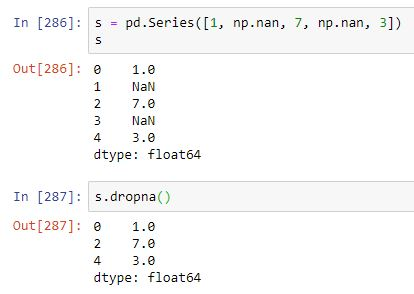

> *Aplicado a un dataframe, el método pandas.DataFrame.dropna ofrece algo más de funcionalidad: podemos escoger si queremos eliminar filas o columnas, y si queremos eliminarlas cuando todos sus elementos sean nulos o simplemente cuando alguno de ellos lo sea. Por ejemplo:*

> 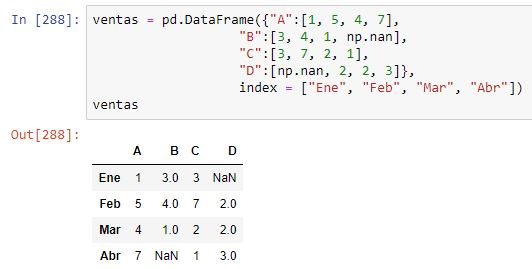

> *Por defecto, el método se aplica al eje 0, es decir, va a eliminar filas que incluyan valores nulos:*

> 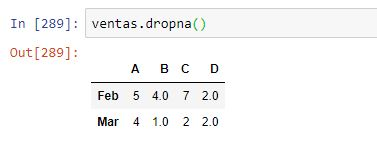

> *Si especificamos el eje 1, lo que se eliminan son las columnas que incluyan valores nulos:*

> 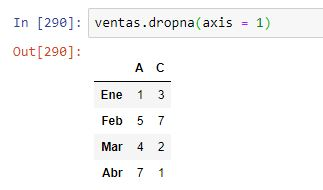


> *Mediante el parámetro how podemos controlar cómo queremos que se aplique el método: si toma el valor "all", solo se eliminarán las filas o columnas en las que todos sus elementos sean nulos. Si toma el valor "any" (valor por defecto), se eliminarán las filas o columnas en las que algún elemento sea nulo. De esta forma:*

> 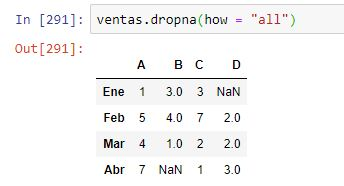

> *Vemos cómo ninguna fila se ha eliminado pues en ninguna de ellas todos los elementos nulos.*

In [61]:
# Mi ejemplo
drp= precs.dropna()
drp.head(5)

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,2572.679932,425.500000,85.318260,27.770000
2020-06-16,2615.270020,436.130005,87.579391,27.780001
2020-06-17,2640.979980,447.769989,87.457504,27.160000
2020-06-18,2653.979980,449.869995,87.492332,27.090000
2020-06-19,2675.010010,453.720001,86.992348,26.590000


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

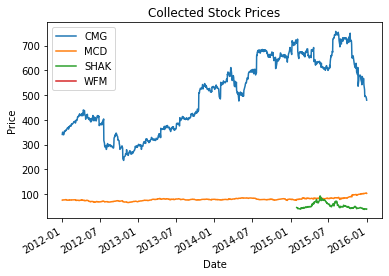

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

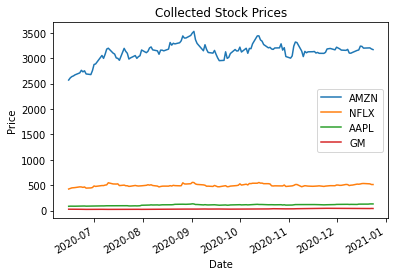

In [ ]:
# Mi ejemplo
precs.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [ ]:
prices.mean(axis=0)

CMG     501.636650
MCD      78.979400
SHAK     53.575708
WFM            NaN
dtype: float64

In [ ]:
# Mi ejemplo
precs.mean(axis=0)

AMZN    3126.199700
NFLX     497.063235
AAPL     111.506258
GM        32.602647
dtype: float64

As well as the standard deviation:

In [ ]:
prices.std(axis=0)

CMG     146.688738
MCD       6.699071
SHAK     11.968587
WFM            NaN
dtype: float64

In [ ]:
# Mi ejemplo
precs.std(axis=0)

AMZN    179.933301
NFLX     25.239572
AAPL     12.247945
GM        6.528989
dtype: float64

> * numpy.mean(arr, axis = None): 

> *Calcule la media aritmética (promedio) de los datos dados (elementos de matriz) a lo largo del eje especificado. Empleando la siguiente fórmula:*

> $ Media(x) = \bar{x} = \frac{\sum_{i = 1}^{N}X_{i}}{N},\  siendo\ (X_{1}, X_{2},...,X_{N})\ el\ conjunto\ de\ observaciones. $

> * numpy.std(arr, axis = None): 

> *Calcula la desviación estándar de los datos dados (elementos de la matriz) a lo largo del eje especificado (si corresponde).*

> *La desviación estándar (S) se mide como la extensión de la distribución de datos en el conjunto de datos dado. Empleando la siguiente fórmula:*

> $ S_{x} =\sqrt{\frac{\sum_{i = 1}^{N}(x_{i} - \bar{x})^{2}}{N - 1}},\ siendo\ (X_{1}, X_{2},...,X_{N})\ un\ conjunto\ de\ datos. $

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [ ]:
prices.describe()

,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,0.0
mean,501.636650,78.979400,53.575708,NaN
std,146.688738,6.699071,11.968587,NaN
min,236.240005,65.829971,38.189999,NaN
25%,371.555000,75.829334,44.119999,NaN
50%,521.270020,78.654839,49.270000,NaN
75%,646.834991,82.062105,61.669998,NaN
max,757.770020,104.861481,92.860001,NaN


In [ ]:
# Mi ejemplo
precs.describe()

,AMZN,NFLX,AAPL,GM
count,136.000000,136.000000,136.000000,136.000000
mean,3126.199700,497.063235,111.506258,32.602647
std,179.933301,25.239572,12.247945,6.528989
min,2572.679932,425.500000,85.318260,23.420000
25%,3072.835083,482.799995,106.304659,26.872499
50%,3152.984985,492.089996,114.675503,30.389999
75%,3206.650024,514.542480,119.513906,37.425000
max,3531.449951,556.549988,133.749039,46.459999


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [ ]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM
Date,,,,
2012-01-03,632.539978,101.362259,NaN,NaN
2012-01-04,647.500000,102.204575,NaN,NaN
2012-01-05,650.960022,102.878311,NaN,NaN
2012-01-06,647.900024,104.057510,NaN,NaN
2012-01-09,629.479980,102.587372,NaN,NaN


In [ ]:
# Mi ejemplo
(5 * precs - 80).head(8)

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-15,12783.399658,2047.500000,346.591301,58.850002
2020-06-16,12996.350098,2100.650024,357.896957,58.900003
2020-06-17,13124.899902,2158.849945,357.287521,55.799999
2020-06-18,13189.899902,2169.349976,357.461662,55.450001
2020-06-19,13295.050049,2188.600006,354.961739,52.950001
2020-06-22,13489.100342,2260.200043,366.341972,51.850004
2020-06-23,13742.049561,2251.300049,375.869026,51.250000
2020-06-24,13591.999512,2209.250031,367.822037,46.400003


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM
Date,,,,
2012-01-04,0.021918,0.005565,NaN,NaN
2012-01-05,0.004961,0.004427,NaN,NaN
2012-01-06,-0.004365,0.007713,NaN,NaN
2012-01-09,-0.026394,-0.009543,NaN,NaN
2012-01-10,0.004062,0.000602,NaN,NaN


In [ ]:
# Mi ejemplo
mu_r = precs.pct_change()[9:]
mu_r.head()

,AMZN,NFLX,AAPL,GM
Date,,,,
2020-06-26,-0.022403,-0.048314,-0.030726,-0.030519
2020-06-29,-0.004638,0.008660,0.023047,0.034342
2020-06-30,0.029265,0.017440,0.008348,0.000000
2020-07-01,0.043453,0.067247,-0.001891,-0.013439
2020-07-02,0.004030,-0.018017,0.000000,0.011218


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

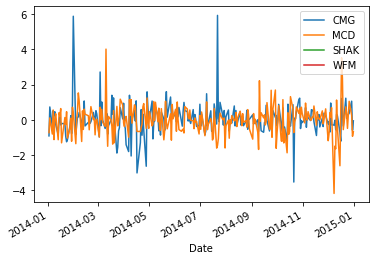

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

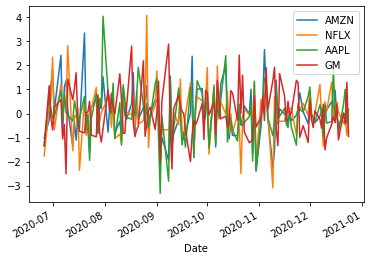

In [ ]:
# Mi ejemplo
n_r = (mu_r - mu_r.mean(axis=0))/mu_r.std(axis=0)
n_r.loc["2020-06-14" : "2020-12-24"].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [ ]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

AttributeError: ignored

In [ ]:
# La instrucción correcta es:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

In [ ]:
# Mi ejemplo
rol = precs.rolling(30).mean()
rol.columns = precs.columns

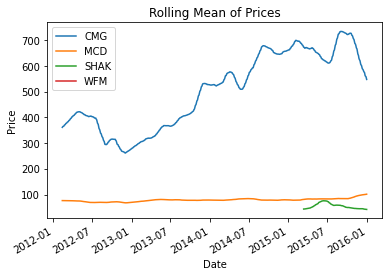

In [ ]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

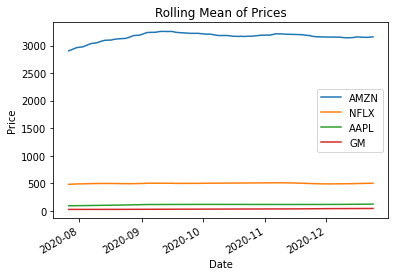

In [ ]:
# Mi ejemplo
rol.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*